<a href="https://colab.research.google.com/github/boriphat12/Wine-and-Food-pairing-quality-analysis/blob/main/Wine_and_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine and Food paring quality score prediction**
this project aim to predict a quality paring score in various wine type and food. The dataset is from [kaggle](https://www.kaggle.com/datasets/wafaaelhusseini/wine-and-food-pairing-dataset). The project aim to predict a quality paring score by analysing the feature such as wine type, wine category, food type and more. The dataset has 34933 rows 8 columns.

**Data dictionary**
|Column|Type|Description|
|--|--|--|
|wine_type|string|Type of wine (e.g. Cabernet Sauvignon, Riesling)|
|wine_category|string|	Red, White, Rosé, Sparkling, Dessert, or Fortified|
|food_item|string|Food or dish paired with the wine|
|food_category|string|Group of the dish (e.g. Red Meat, Seafood, Cheese, Dessert)|
|cuisine|string|Cuisine type (e.g. Italian, Thai, French, Mexican)|
|pairing_quality|int (1–5)|Numerical rating: 1=Terrible → 5=Excellent|
|quality_label|string|Categorical label (Excellent, Good, Neutral, Poor, Terrible)|
|description|string|Text explanation of why the pairing works or fails|

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('wine_food_pairings.csv')
df.head()

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


# **Data preprocessing**

In [ ]:
df.shape

(34933, 8)

In [ ]:
df.isnull().sum()

,0
wine_type,0
wine_category,0
food_item,0
food_category,0
cuisine,0
pairing_quality,0
quality_label,0
description,0


In [ ]:
df.nunique()

,0
wine_type,29
wine_category,6
food_item,38
food_category,12
cuisine,17
pairing_quality,5
quality_label,5
description,21


In [ ]:
df['description'].unique()

array(['Heuristic pairing assessment.',
       'Acidic wine balances acidic food.',
       'Tannic red complements red meat fat.',
       'Crisp acidity suits seafood.', 'Heavy wine can dominate poultry.',
       'Acidic wine balances acidic food.; Sweet/sparkling pairs with dessert.',
       'Richer body matches creamy textures.',
       'Lighter wines fit poultry.',
       'Tannic reds clash with delicate seafood.',
       'Sweet/sparkling pairs with dessert.',
       'Idealized perfect pairing example for contrast.',
       'Too lean for creamy dish.',
       'Light/medium red suits richer poultry/pork.',
       'Dry table wine clashes with dessert sweetness.',
       'Deliberately bad pairing example for contrast.',
       'Delicate wine overwhelmed by red meat.',
       'Off-dry sweetness calms spice.',
       'Low-acid wine seems flabby vs acids.',
       'High tannin intensifies spice heat.',
       'Light red (Pinot) with salmon works.',
       'Acidic wine balances acidic food

In [ ]:
# clean the description columns since some of them have 2 descriptions
description_dummies = df['description'].str.get_dummies(sep='; ')
description_dummies = description_dummies.add_prefix('desc_')
df = pd.concat([df, description_dummies], axis=1)
df.head()


,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description,desc_Acidic wine balances acidic food.,desc_Crisp acidity suits seafood.,...,desc_Light red (Pinot) with salmon works.,desc_Light/medium red suits richer poultry/pork.,desc_Lighter wines fit poultry.,desc_Low-acid wine seems flabby vs acids.,desc_Off-dry sweetness calms spice.,desc_Richer body matches creamy textures.,desc_Sweet/sparkling pairs with dessert.,desc_Tannic red complements red meat fat.,desc_Tannic reds clash with delicate seafood.,desc_Too lean for creamy dish.
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['wine_type', 'wine_category', 'food_item', 'food_category', 'cuisine',
       'pairing_quality', 'quality_label', 'description',
       'desc_Acidic wine balances acidic food.',
       'desc_Crisp acidity suits seafood.',
       'desc_Deliberately bad pairing example for contrast.',
       'desc_Delicate wine overwhelmed by red meat.',
       'desc_Dry table wine clashes with dessert sweetness.',
       'desc_Heavy wine can dominate poultry.',
       'desc_Heuristic pairing assessment.',
       'desc_High tannin intensifies spice heat.',
       'desc_Idealized perfect pairing example for contrast.',
       'desc_Light red (Pinot) with salmon works.',
       'desc_Light/medium red suits richer poultry/pork.',
       'desc_Lighter wines fit poultry.',
       'desc_Low-acid wine seems flabby vs acids.',
       'desc_Off-dry sweetness calms spice.',
       'desc_Richer body matches creamy textures.',
       'desc_Sweet/sparkling pairs with dessert.',
       'desc_Tannic red compleme

# **Data Exploratory**
In data exploratory, I will try to find the relationship between independent variables and target variables so that I could understand each features more

**Wine Category**

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Red'),
  Text(1, 0, 'Fortified'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Dessert'),
  Text(4, 0, 'Sparkling'),
  Text(5, 0, 'Rosé')])

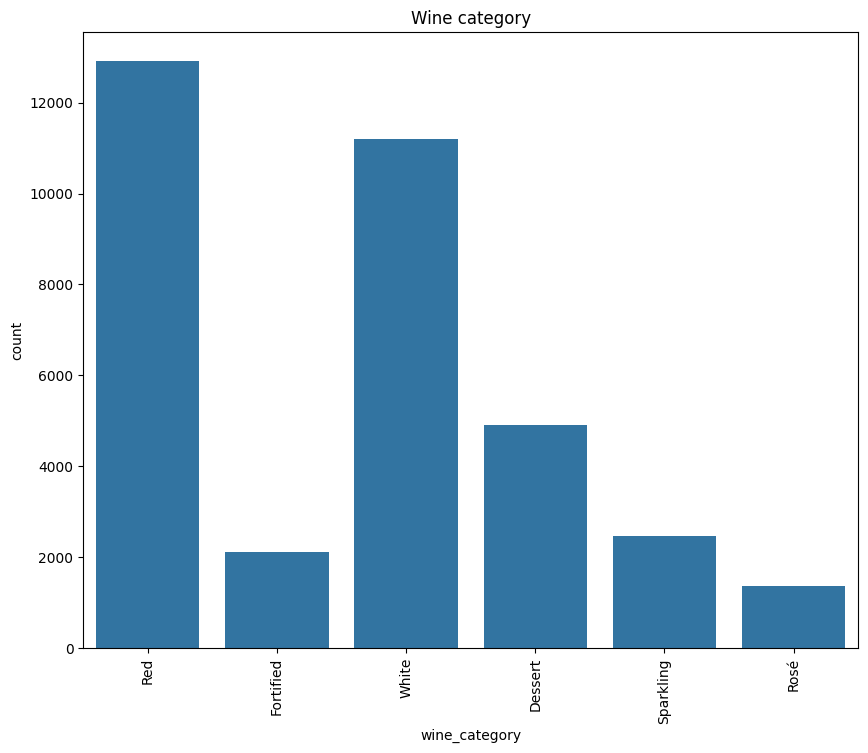

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='wine_category', data=df).set_title('Wine category')
plt.xticks(rotation=90)

According to the graph, most of the wines are Red and White. This suggests that these categories might be popular because they have a good taste and pair well with many type of food, which allows them to dominate the wine scene.

**Wine type**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Syrah/Shiraz'),
  Text(1, 0, 'Grenache'),
  Text(2, 0, 'Madeira'),
  Text(3, 0, 'Cabernet Sauvignon'),
  Text(4, 0, 'Viognier'),
  Text(5, 0, 'Pinot Noir'),
  Text(6, 0, 'Albariño'),
  Text(7, 0, 'Sangiovese'),
  Text(8, 0, 'Grüner Veltliner'),
  Text(9, 0, 'Sauternes'),
  Text(10, 0, 'Cava'),
  Text(11, 0, 'Riesling (dry)'),
  Text(12, 0, 'Chardonnay'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Port'),
  Text(15, 0, 'Ice Wine'),
  Text(16, 0, 'Gewürztraminer'),
  Text(17, 0, 'Merlot'),
  Text(18, 0, 'Champagne'),
  Text(19, 0, 'Torrontés'),
  Text(20, 0, 'Sauvignon Blanc'),
  Text(21, 0, 'Malbec'),
  Text(22, 0, 'Zinfandel'),
  Text(23, 0, 'Barbera'),
  Text(24, 0, 'Chenin Blanc'),
  Text(25, 0, 'Provence Rosé'),
  Text(26, 0, 'Gamay (Beaujolais)'),
  Text(27, 0, 'Tempranillo'),
  Text(28, 0, 'White Zinfandel

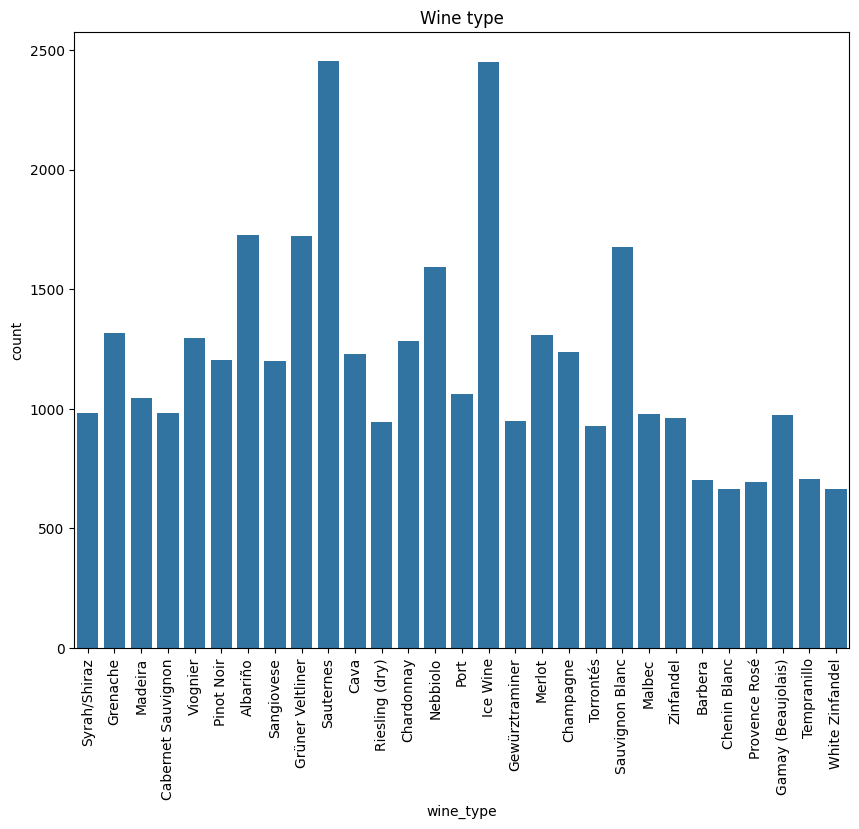

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='wine_type', data=df).set_title('Wine type')
plt.xticks(rotation=90)

According to the graph, Sauternes and Ice wine seem to be very popular. This suggests they might have a good price and taste, or that they pair particularly well with food.

**Food item**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'smoked sausage'),
  Text(1, 0, 'charcuterie board'),
  Text(2, 0, 'lemon tart'),
  Text(3, 0, 'roast lamb'),
  Text(4, 0, 'duck à l’orange'),
  Text(5, 0, 'citrus salad'),
  Text(6, 0, 'oysters'),
  Text(7, 0, 'cheese platter'),
  Text(8, 0, 'bacon burger'),
  Text(9, 0, 'chicken curry'),
  Text(10, 0, 'vegetable curry'),
  Text(11, 0, 'alfredo pasta'),
  Text(12, 0, 'Thai curry'),
  Text(13, 0, 'roast chicken with herbs'),
  Text(14, 0, 'shrimp scampi'),
  Text(15, 0, 'stir-fried tofu'),
  Text(16, 0, 'cheesecake'),
  Text(17, 0, 'beef stew'),
  Text(18, 0, 'grilled burger'),
  Text(19, 0, 'Indian vindaloo'),
  Text(20, 0, 'mushroom risotto'),
  Text(21, 0, 'grilled salmon'),
  Text(22, 0, 'mac and cheese'),
  Text(23, 0, 'sorbet'),
  Text(24, 0, 'grilled 

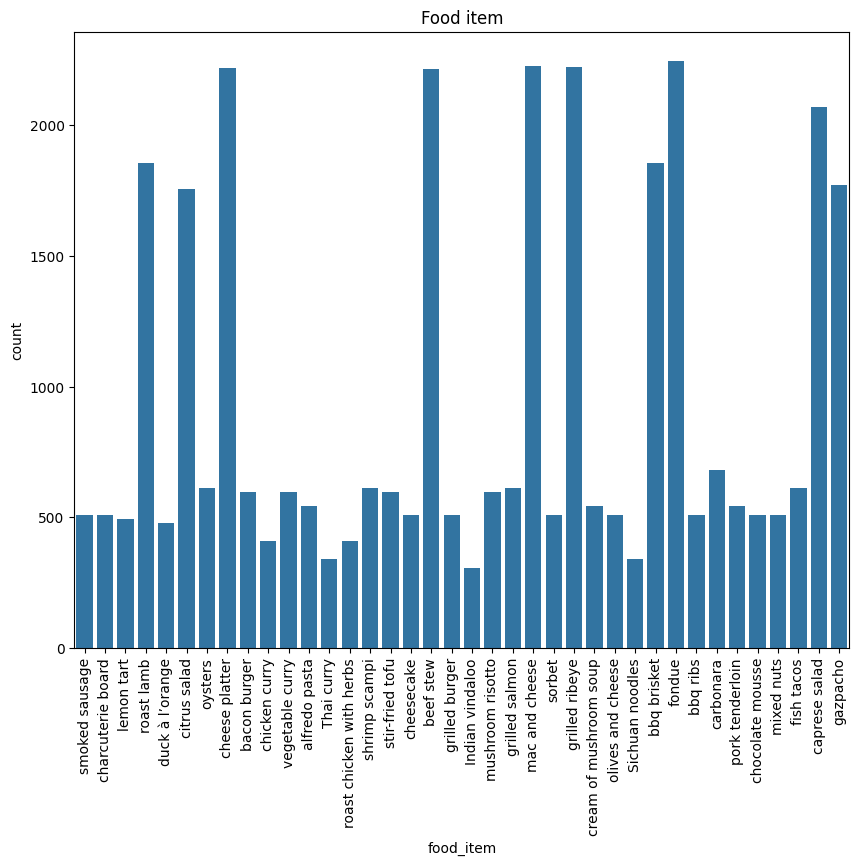

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='food_item', data=df).set_title('Food item')
plt.xticks(rotation=90)

According to the graph, several foods have a high pick rate for wine pairings, such as cheese platter, beef stew, mac and cheese, grilled ribeye, bbq brisket, fondue, caprese salad, and gazpacho. Many foods on this list are made with cheese or are greasy, which looks salty. This might mean that most wines pair well with salty food.

**Food category**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Smoky BBQ'),
  Text(1, 0, 'Salty Snack'),
  Text(2, 0, 'Dessert'),
  Text(3, 0, 'Red Meat'),
  Text(4, 0, 'Poultry'),
  Text(5, 0, 'Acidic'),
  Text(6, 0, 'Seafood'),
  Text(7, 0, 'Cheese'),
  Text(8, 0, 'Pork'),
  Text(9, 0, 'Vegetarian'),
  Text(10, 0, 'Creamy'),
  Text(11, 0, 'Spicy')])

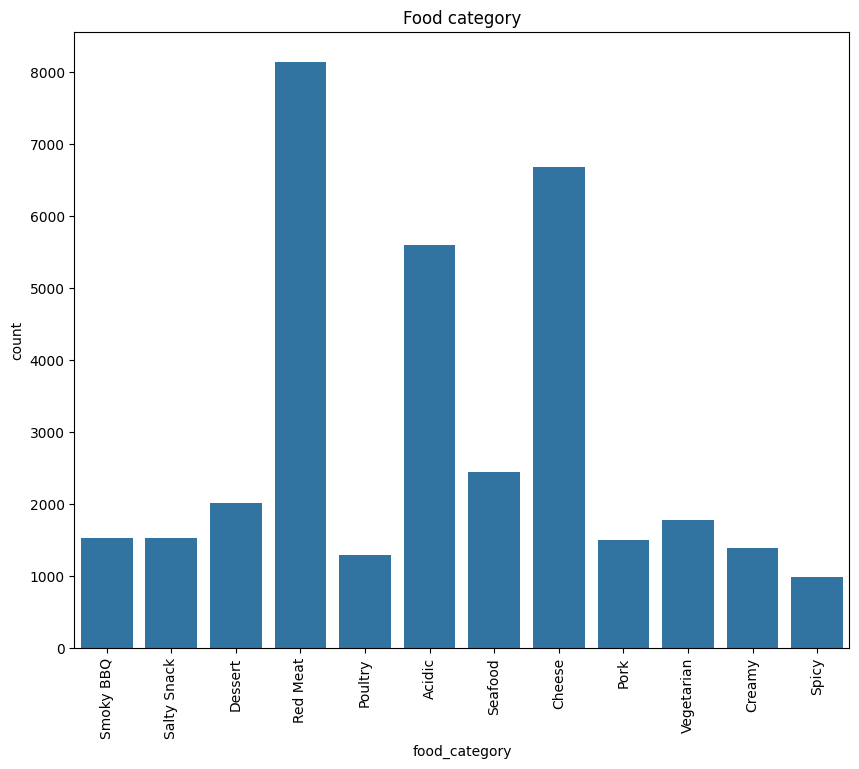

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='food_category', data=df).set_title('Food category')
plt.xticks(rotation=90)

According to the graph, the information seems to relate to food items that wine is generally paired with red meat and cheese.

**Cuisine**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Spanish'),
  Text(1, 0, 'French'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'Vietnamese'),
  Text(4, 0, 'Argentinian'),
  Text(5, 0, 'Moroccan'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'American BBQ'),
  Text(8, 0, 'German'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Middle Eastern'),
  Text(11, 0, 'Japanese'),
  Text(12, 0, 'Chinese (Sichuan)'),
  Text(13, 0, 'Ethiopian'),
  Text(14, 0, 'Greek'),
  Text(15, 0, 'Korean'),
  Text(16, 0, 'Indian')])

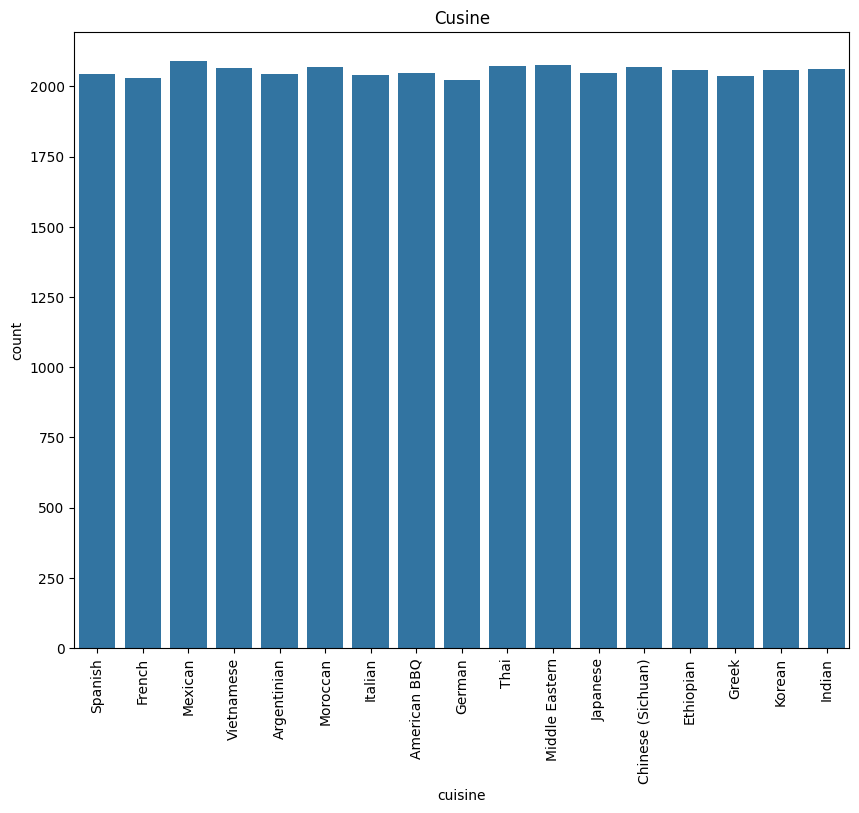

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='cuisine', data=df).set_title('Cusine')
plt.xticks(rotation=90)

According to the graph, each country seems to have menus to pair with wine

**Description**

/tmp/ipython-input-4005828212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


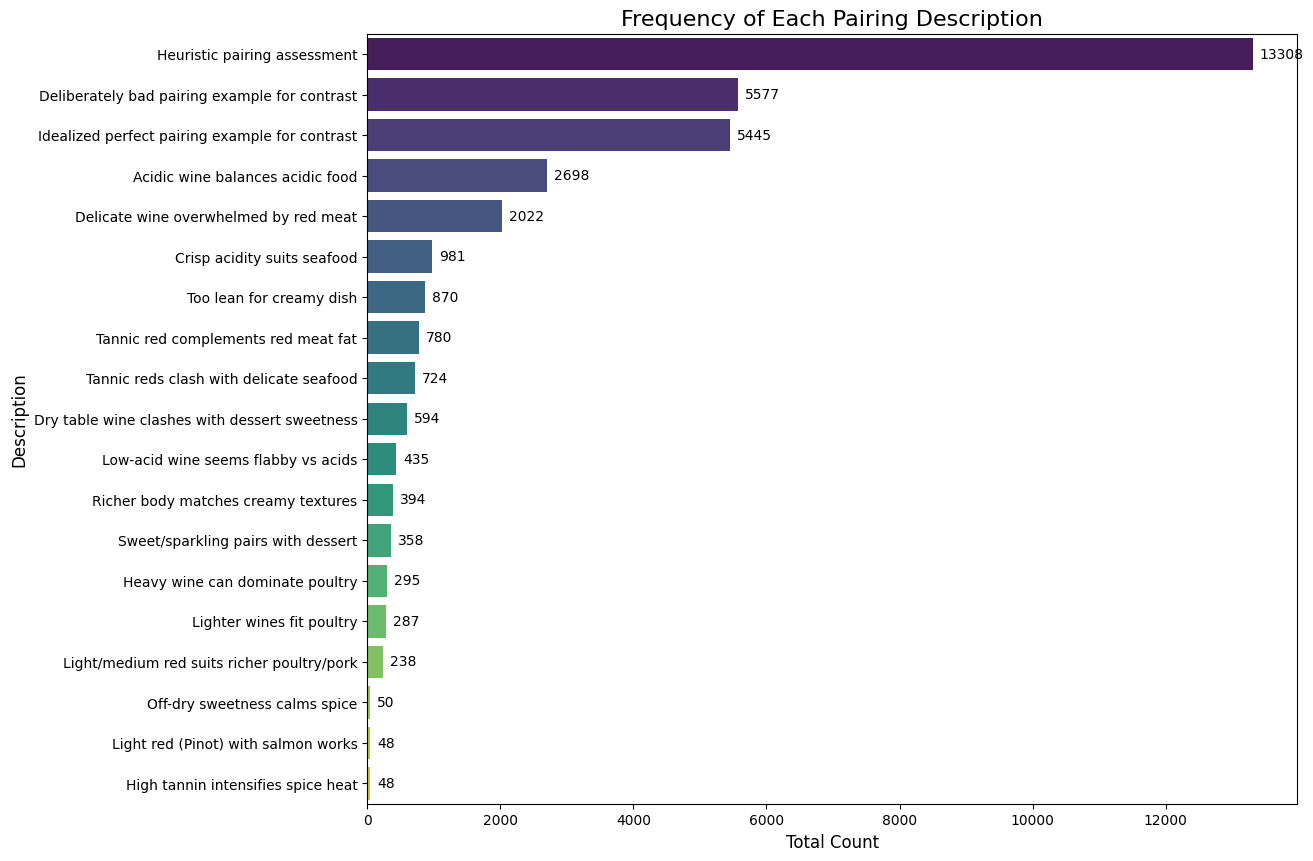

In [ ]:
description_counts = description_dummies.sum()
description_counts = description_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
ax = sns.barplot(
        y=description_counts.index.str.replace('desc_', '', regex=False).str.replace('.', '', regex=False),
        x=description_counts.values,
        palette='viridis'
)

ax.set_title('Frequency of Each Pairing Description', fontsize=16)
ax.set_xlabel('Total Count', fontsize=12)
ax.set_ylabel('Description', fontsize=12)

for container in ax.containers:
  ax.bar_label(container, padding=5, fontsize=10, fmt='%d')

According to the graph, most of the wine pairings are of a normal quality, as they fall under the 'Heuristic pairing assessment' category followed by 'deliberately bad pairing example for contrast' and 'Idealized perfect pairing example for contrast' which mean its a very bad wine and very good wines.

**Wine category and Paring Quality**

   wine_category Statistic  Pairing Quality
0        Dessert      Mean         3.002855
1      Fortified      Mean         2.962928
2            Red      Mean         3.047722
3           Rosé      Mean         2.937362
4      Sparkling      Mean         3.051053
5          White      Mean         2.994193
6        Dessert    Median         3.000000
7      Fortified    Median         3.000000
8            Red    Median         3.000000
9           Rosé    Median         3.000000
10     Sparkling    Median         3.000000
11         White    Median         3.000000
12       Dessert      Mode         3.000000
13     Fortified      Mode         3.000000
14           Red      Mode         3.000000
15          Rosé      Mode         3.000000
16     Sparkling      Mode         3.000000
17         White      Mode         3.000000


Text(0, 0.5, 'Pairing quality')

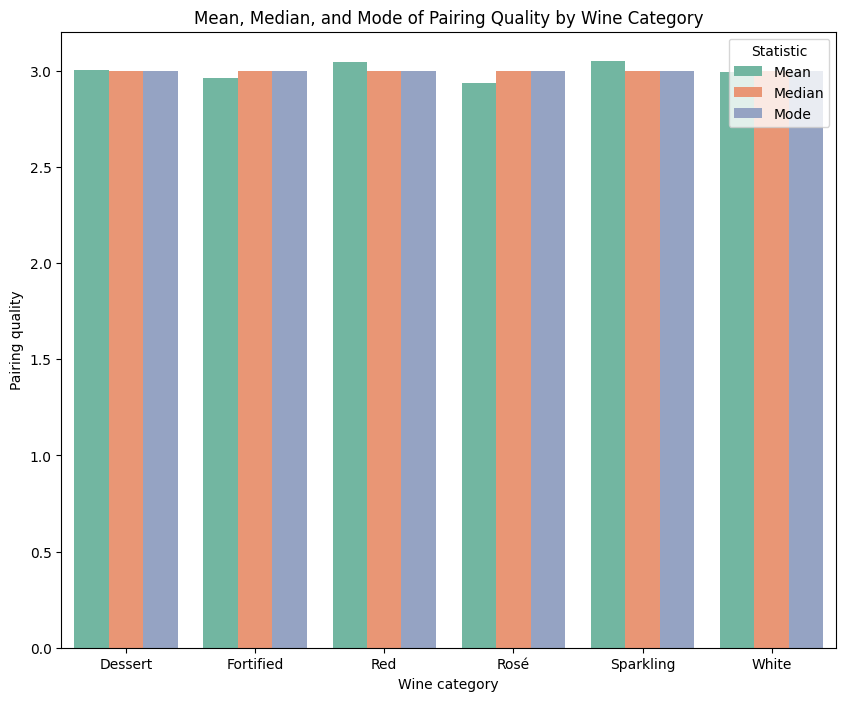

In [ ]:
stats = df.groupby('wine_category')['pairing_quality'].agg(
        Mean='mean',
        Median='median',
        Mode=lambda x: x.mode().iloc[0]
  )
plt.figure(figsize=(10, 8))
stats_long = stats.reset_index().melt(
        id_vars='wine_category',
        var_name='Statistic',
        value_name='Pairing Quality'
  )
print(stats_long)
ax = sns.barplot(
        data=stats_long,
        x='wine_category',
        y='Pairing Quality',
        hue='Statistic',
        palette='Set2'
    )
plt.title('Mean, Median, and Mode of Pairing Quality by Wine Category')
plt.xlabel('Wine category')
plt.ylabel('Pairing quality')

It looks like every category of wine has mean, median and mode of the pairing quality close to 3.0, which might mean each category has both good and bad food pairings.

**Wine type and Paring Quality**

/tmp/ipython-input-1673420361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wine_type', y='pairing_quality', data=mean_quality_df, palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Albariño'),
  Text(1, 0, 'Barbera'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Cava'),
  Text(4, 0, 'Champagne'),
  Text(5, 0, 'Chardonnay'),
  Text(6, 0, 'Chenin Blanc'),
  Text(7, 0, 'Gamay (Beaujolais)'),
  Text(8, 0, 'Gewürztraminer'),
  Text(9, 0, 'Grenache'),
  Text(10, 0, 'Grüner Veltliner'),
  Text(11, 0, 'Ice Wine'),
  Text(12, 0, 'Madeira'),
  Text(13, 0, 'Malbec'),
  Text(14, 0, 'Merlot'),
  Text(15, 0, 'Nebbiolo'),
  Text(16, 0, 'Pinot Noir'),
  Text(17, 0, 'Port'),
  Text(18, 0, 'Provence Rosé'),
  Text(19, 0, 'Riesling (dry)'),
  Text(20, 0, 'Sangiovese'),
  Text(21, 0, 'Sauternes'),
  Text(22, 0, 'Sauvignon Blanc'),
  Text(23, 0, 'Syrah/Shiraz'),
  Text(24, 0, 'Tempranillo'),
  Text(25, 0, 'Torrontés'),
  Text(26, 0, 'Viognier'),
  Text(27, 0, 'White Zinfandel'),
  Text(28, 0, 'Zinfandel

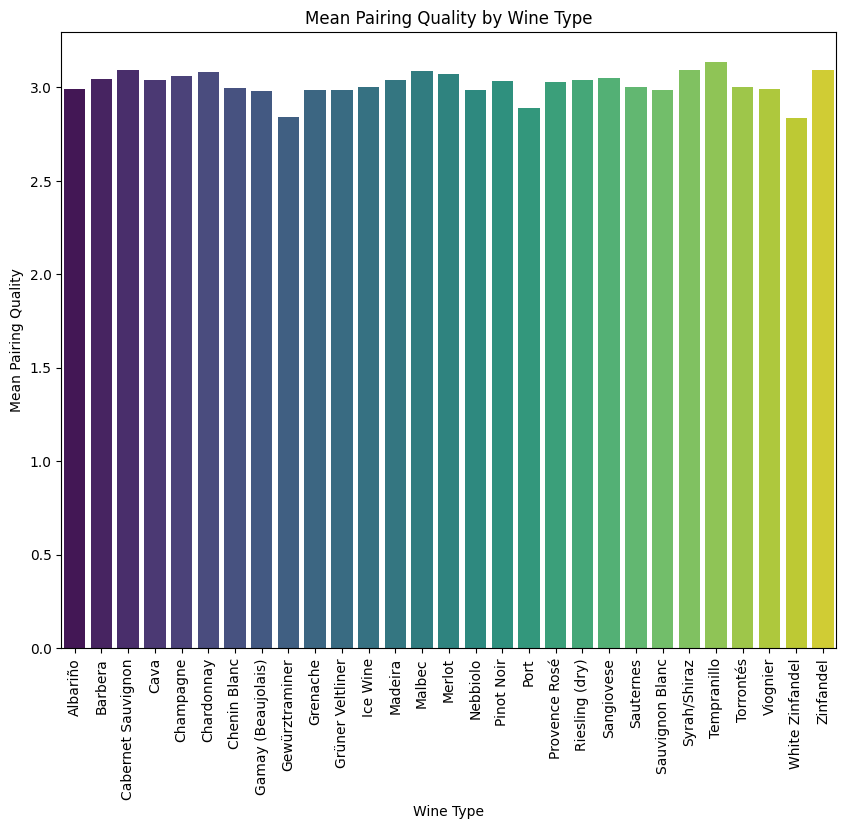

In [ ]:
mean_quality = df.groupby('wine_type')['pairing_quality'].mean()
plt.figure(figsize=(10, 8))
mean_quality_df=  mean_quality.reset_index()
sns.barplot(x='wine_type', y='pairing_quality', data=mean_quality_df, palette='viridis')
plt.title('Mean Pairing Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Mean Pairing Quality')
plt.xticks(rotation=90)

Some of the wine categories have an average pairing quality slightly above 3.0, which means they might pair well with various foods.

**Description and Pairing Quality**

/tmp/ipython-input-328190959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='description_final', y='pairing_quality', data=df_long, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Idealized perfect pairing example for contrast.'),
  Text(1, 0, 'Sweet/sparkling pairs with dessert.'),
  Text(2, 0, 'Off-dry sweetness calms spice.'),
  Text(3, 0, 'Richer body matches creamy textures.'),
  Text(4, 0, 'Crisp acidity suits seafood.'),
  Text(5, 0, 'Tannic red complements red meat fat.'),
  Text(6, 0, 'Light red (Pinot) with salmon works.'),
  Text(7, 0, 'Lighter wines fit poultry.'),
  Text(8, 0, 'Light/medium red suits richer poultry/pork.'),
  Text(9, 0, 'Acidic wine balances acidic food.'),
  Text(10, 0, 'Heuristic pairing assessment.'),
  Text(11, 0, 'Dry table wine clashes with dessert sweetness.'),
  Text(12, 0, 'High tannin intensifies spice heat.'),
  Text(13, 0, 'Tannic reds clash with delicate seafood.'),
  Text(14, 0, 'Too lean for creamy dish.'),
  Text(15, 0, 'Delicate wine overwhelmed by red meat.'),
  Text(16, 0, 'Heavy wine can dominate poultry.'),
  Text(17, 0, 'Low-acid

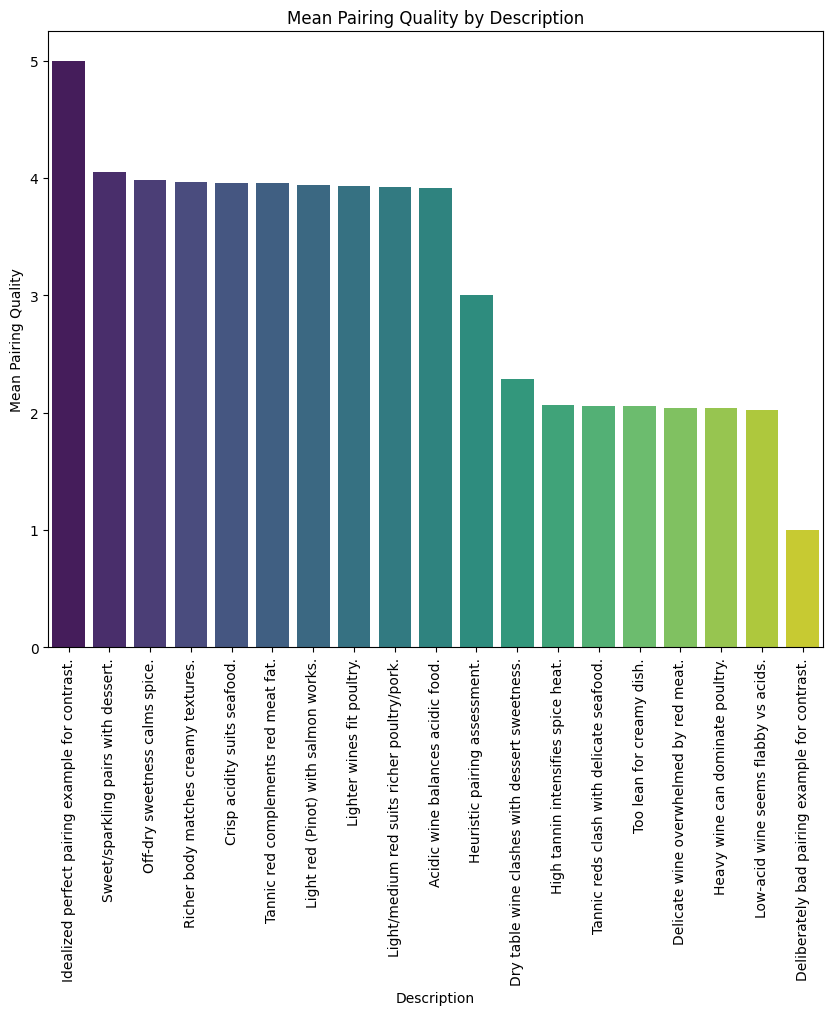

In [ ]:
df['description_cleaned'] = df['description'].str.replace(r'\s*;\s*', ';', regex=True)
df['description_list'] = df['description_cleaned'].str.split(';')

df_long = df.explode('description_list')
df_long['description_final'] = df_long['description_list'].str.strip()
df_long = df_long.groupby('description_final')['pairing_quality'].mean().reset_index()
df_long = df_long.sort_values(by='pairing_quality', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='description_final', y='pairing_quality', data=df_long, palette='viridis')
plt.title('Mean Pairing Quality by Description')
plt.xlabel('Description')
plt.ylabel('Mean Pairing Quality')
plt.xticks(rotation=90)


From the graph, it shows that the description clearly identifies the pairing score. For example, 'Idealized perfect pairing example for contrast' has a 5 for its pairing score, while 'Deliberately bad pairing example for contrast' has an average pairing score of 1.

**Food item and Pairing Quality**

Text(0, 0.5, 'Mean Pairing Quality')

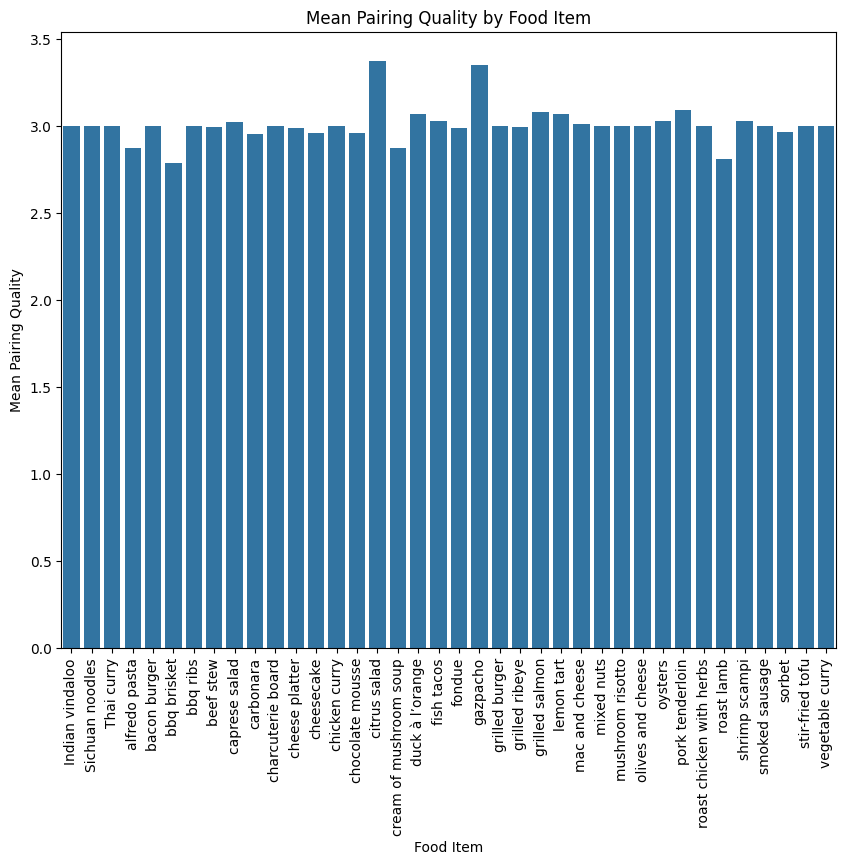

In [ ]:
food_item_mean = df.groupby('food_item')['pairing_quality'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x='food_item', y='pairing_quality', data=food_item_mean)
plt.xticks(rotation=90)
plt.title('Mean Pairing Quality by Food Item')
plt.xlabel('Food Item')
plt.ylabel('Mean Pairing Quality')

The graph shows that most of the food items can be eaten with wine, and some of them, like 'citrus salad' and 'gazpacho,' are particularly good pairings.